# Fall Detection using SisFall Dataset

In [211]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Utility functions for SisFall dataset

**ADXL345**
Resolution: 13 bits
Range: +-16g

**ITG3200**
Resolution: 16 bits
Range: +-2000?s

**MMA8451Q**
Resolution: 14 bits
Range: +-8g

In [212]:
ACCEL_ADXL345_RANGE = 16  # ±16g
ACCEL_ADXL345_RES = 13

GYRO_ITG3200_RANGE = 2000  # ±2000°/s
GYRO_ITG3200_RES = 16

ACCEL_MMA8451Q_RANGE = 8  # ±8g
ACCEL_MMA8451Q_RES = 14

In [213]:
# Accelerometer conversion functions
def convert_accel_adxl345(raw_bits):
    return (2 * ACCEL_ADXL345_RANGE / (2 ** ACCEL_ADXL345_RES)) * raw_bits


def convert_accel_mma8451q(raw_bits):
    return (2 * ACCEL_MMA8451Q_RANGE / (2 ** ACCEL_MMA8451Q_RES)) * raw_bits

In [214]:
# Gyroscope conversion function
def convert_gyro_itg3200(raw_bits):
    return (2 * GYRO_ITG3200_RANGE / (2 ** GYRO_ITG3200_RES)) * raw_bits

In [215]:
# Labeling function
def get_label_from_filename(filename):
    if filename.startswith('F'):
        return 'fall'
    elif filename.startswith('D'):
        return 'adl'
    else:
        return 'unknown'

## Load and preprocess SisFall dataset

In [216]:
# Load single file
def load_sisfall_file(filepath):
    raw_data = pd.read_csv(filepath, header=None, sep=',')

    # Remove trailing semicolon from each element
    raw_data = raw_data.map(lambda x: float(x.rstrip(';')) if isinstance(x, str) else x)

    data_converted = pd.DataFrame({
        'accel_adxl345_x': convert_accel_adxl345(raw_data[0]),
        'accel_adxl345_y': convert_accel_adxl345(raw_data[1]),
        'accel_adxl345_z': convert_accel_adxl345(raw_data[2]),

        'gyro_itg3200_x': convert_gyro_itg3200(raw_data[3]),
        'gyro_itg3200_y': convert_gyro_itg3200(raw_data[4]),
        'gyro_itg3200_z': convert_gyro_itg3200(raw_data[5]),

        'accel_mma8451q_x': convert_accel_mma8451q(raw_data[6]),
        'accel_mma8451q_y': convert_accel_mma8451q(raw_data[7]),
        'accel_mma8451q_z': convert_accel_mma8451q(raw_data[8])
    })

    label = get_label_from_filename(os.path.basename(filepath))
    data_converted['label'] = label

    return data_converted

In [217]:
# Load entire dataset
def load_sisfall_dataset(dataset_dir):
    dataset = []

    for subject_folder in os.listdir(dataset_dir):
        subject_path = os.path.join(dataset_dir, subject_folder)

        if os.path.isdir(subject_path):
            for file in os.listdir(subject_path):
                if file.endswith('.txt'):
                    # Load the file and convert the data
                    filepath = os.path.join(subject_path, file)
                    file_data = load_sisfall_file(filepath)

                    # Add filename and subject information
                    file_data['filename'] = file
                    file_data['subject'] = subject_folder

                    dataset.append(file_data)

    full_dataset = pd.concat(dataset, ignore_index=True)

    return full_dataset

In [218]:
# Uncomment the following lines to load the SisFall dataset
# dataset_dir = 'SisFall_dataset'
# sisfall_data = load_sisfall_dataset(dataset_dir)
# sisfall_data.to_csv('sisfall_dataset.csv', index=False)

In [219]:
# Load the dataset from CSV file
sisfall_data = pd.read_csv('sisfall_dataset.csv')

## Exploratory Data Analysis

In [220]:
# Check the first few rows of the dataset
sisfall_data.head()

,accel_adxl345_x,accel_adxl345_y,accel_adxl345_z,gyro_itg3200_x,gyro_itg3200_y,gyro_itg3200_z,accel_mma8451q_x,accel_mma8451q_y,accel_mma8451q_z,label,filename,subject
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,0.074219,-0.680664,-0.272461,adl,D01_SA01_R01.txt,SA01
1,0.058594,-0.679688,-0.351562,-3.234863,-34.667969,-18.676758,0.046875,-0.659180,-0.248047,adl,D01_SA01_R01.txt,SA01
2,0.003906,-0.687500,-0.316406,-5.126953,-37.414551,-16.540527,-0.001953,-0.652344,-0.215820,adl,D01_SA01_R01.txt,SA01
3,-0.039062,-0.703125,-0.300781,-6.347656,-39.489746,-13.854980,-0.033203,-0.680664,-0.170898,adl,D01_SA01_R01.txt,SA01
4,-0.082031,-0.746094,-0.246094,-7.812500,-41.198730,-11.657715,-0.072266,-0.723633,-0.129883,adl,D01_SA01_R01.txt,SA01


In [221]:
# Check the shape of the dataset
sisfall_data.shape

(15858929, 12)

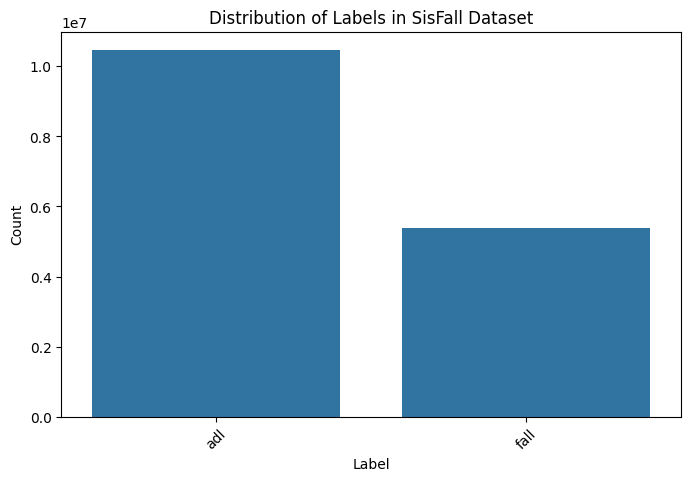

In [222]:
# Check the distribution of labels
label_counts = sisfall_data['label'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels in SisFall Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [223]:
# Check for missing values
missing_values = sisfall_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [224]:
# Check the data types of the columns
sisfall_data.dtypes

accel_adxl345_x     float64
accel_adxl345_y     float64
accel_adxl345_z     float64
gyro_itg3200_x      float64
gyro_itg3200_y      float64
gyro_itg3200_z      float64
accel_mma8451q_x    float64
accel_mma8451q_y    float64
accel_mma8451q_z    float64
label                object
filename             object
subject              object
dtype: object

In [225]:
# Check the summary statistics of the dataset
sisfall_data.describe()

,accel_adxl345_x,accel_adxl345_y,accel_adxl345_z,gyro_itg3200_x,gyro_itg3200_y,gyro_itg3200_z,accel_mma8451q_x,accel_mma8451q_y,accel_mma8451q_z
count,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07
mean,-4.832774e-03,-6.982077e-01,-1.083005e-01,-5.929070e-01,2.146792e+00,-2.725448e-01,-1.844993e-02,-6.840996e-01,-5.797724e-02
std,4.101803e-01,5.856842e-01,4.878332e-01,3.606290e+01,2.987677e+01,2.430040e+01,3.990512e-01,5.690894e-01,4.942543e-01
min,-1.600000e+01,-1.600000e+01,-1.600000e+01,-1.971619e+03,-9.454956e+02,-8.026123e+02,-8.000000e+00,-8.000000e+00,-8.000000e+00
25%,-8.593750e-02,-9.882812e-01,-3.593750e-01,-4.638672e+00,-1.098633e+00,-2.014160e+00,-9.472656e-02,-9.667969e-01,-3.095703e-01
50%,7.812500e-03,-8.984375e-01,-1.210938e-01,-6.713867e-01,2.319336e+00,-3.051758e-01,9.765625e-04,-8.837891e-01,-6.640625e-02
75%,1.015625e-01,-2.109375e-01,1.289062e-01,3.967285e+00,5.737305e+00,1.403809e+00,8.007812e-02,-2.041016e-01,1.806641e-01
max,1.599219e+01,1.598438e+01,1.598047e+01,1.999939e+03,9.655151e+02,8.421631e+02,7.999023e+00,7.999023e+00,7.999023e+00


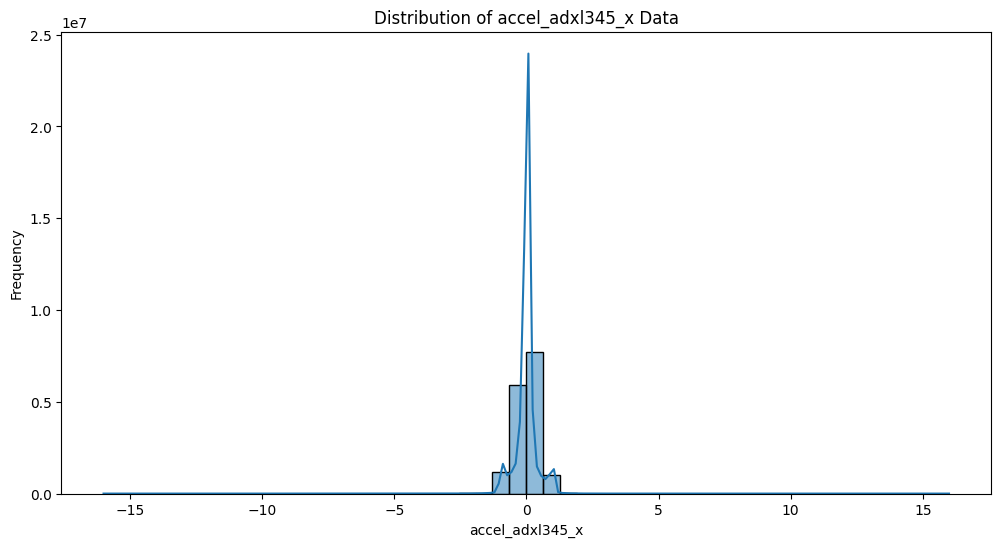

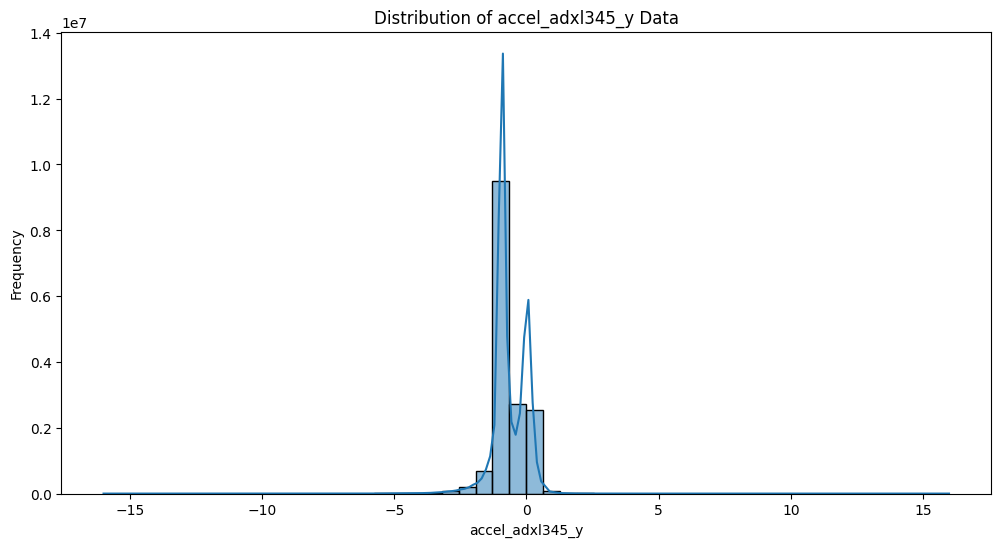

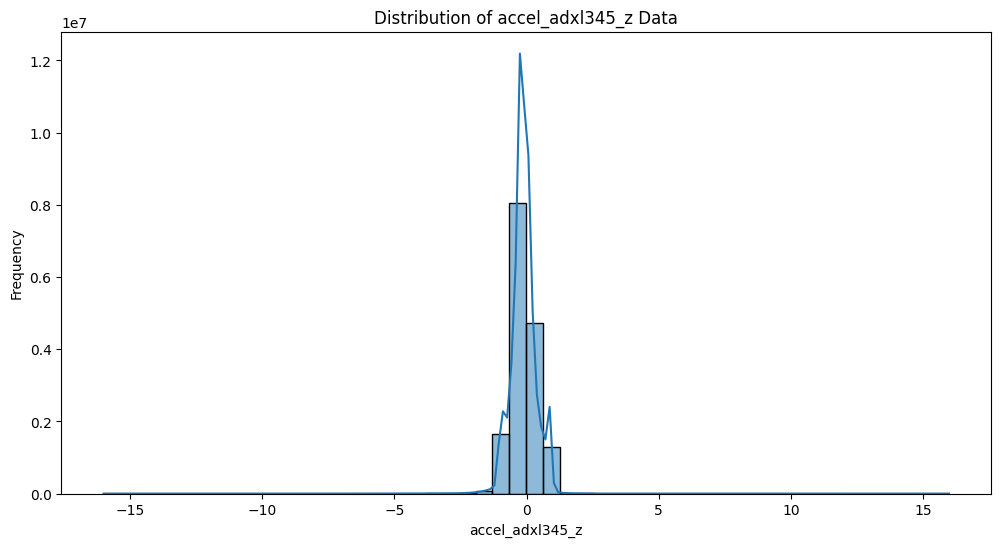

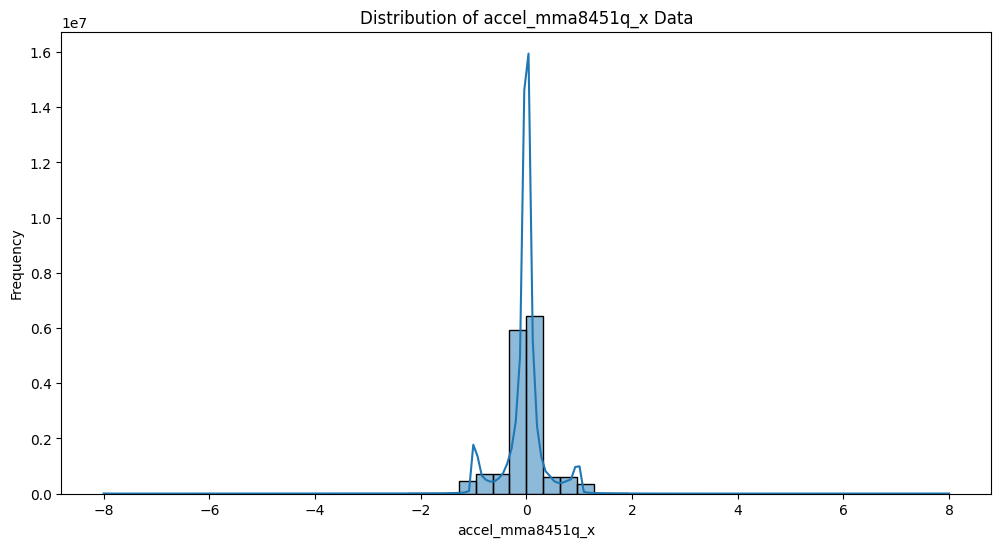

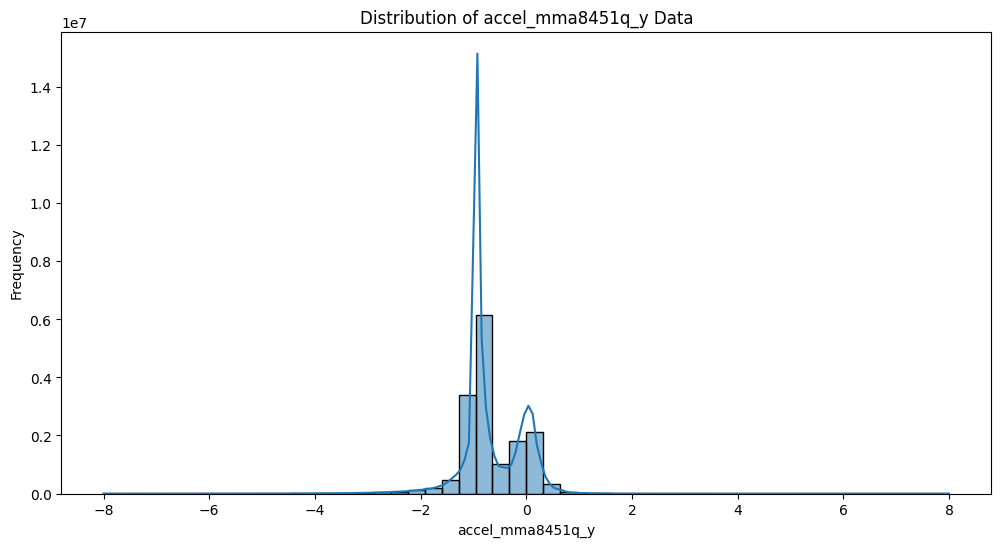

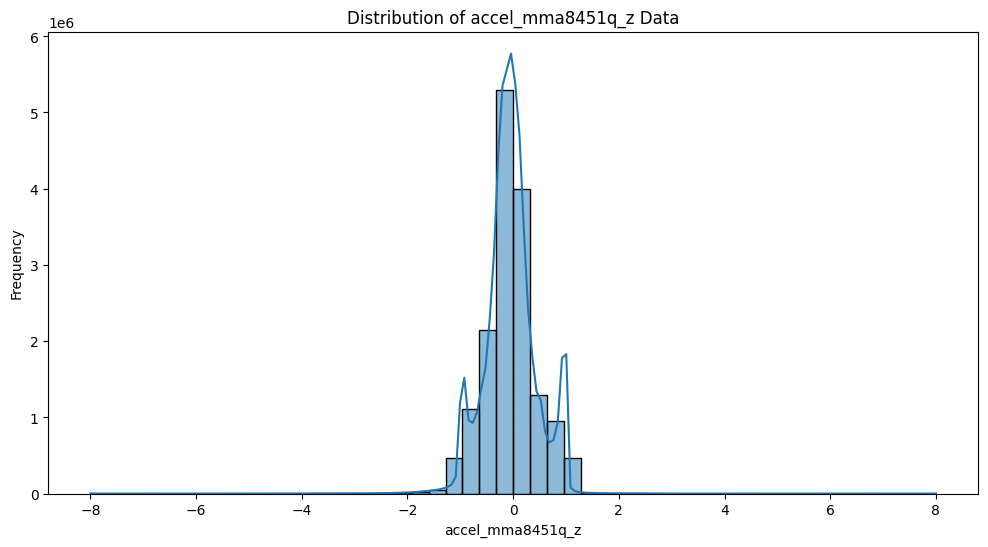

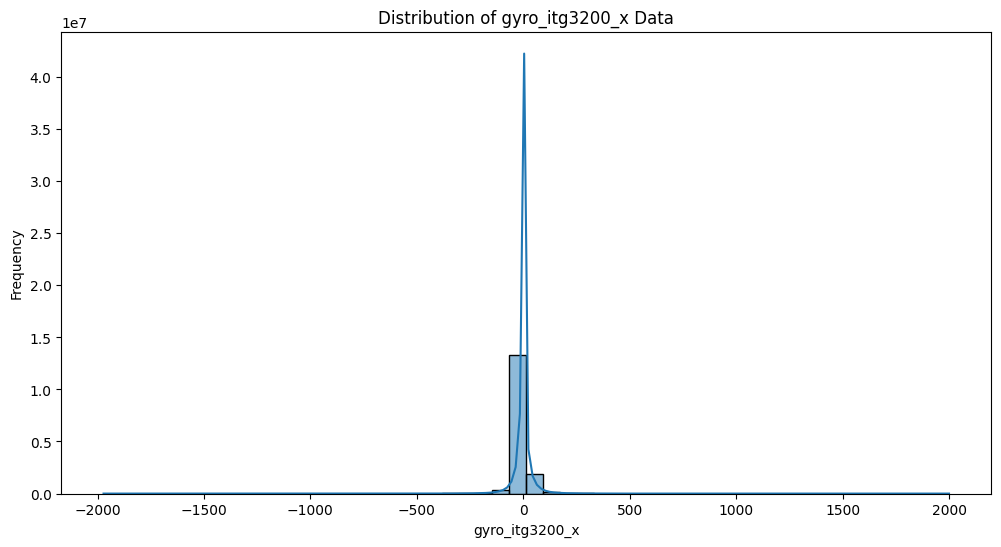

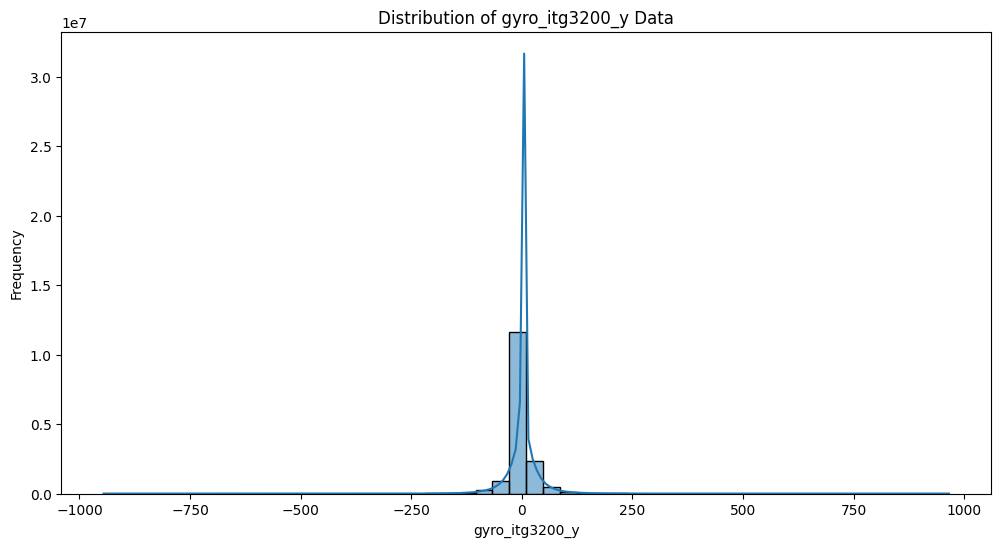

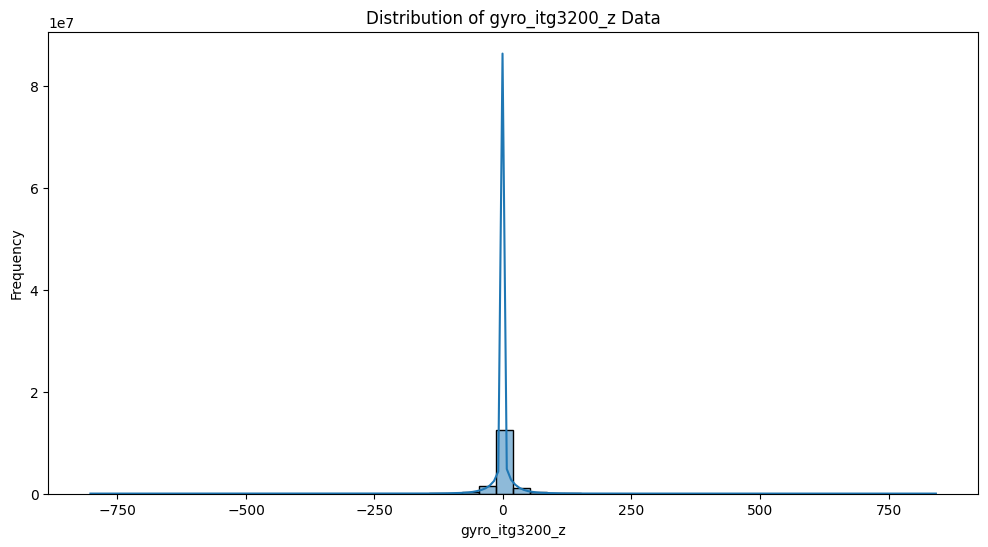

In [226]:
# Visualize the distribution of accelerometer and gyroscope data
def plot_sensor_data_distribution(data, sensor):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[sensor], bins=50, kde=True)
    plt.title(f'Distribution of {sensor} Data')
    plt.xlabel(sensor)
    plt.ylabel('Frequency')
    plt.show()


# Plot accelerometer data
accel_columns = [col for col in sisfall_data.columns if 'accel' in col]
for col in accel_columns:
    plot_sensor_data_distribution(sisfall_data, col)

# Plot gyroscope data
gyro_columns = [col for col in sisfall_data.columns if 'gyro' in col]
for col in gyro_columns:
    plot_sensor_data_distribution(sisfall_data, col)

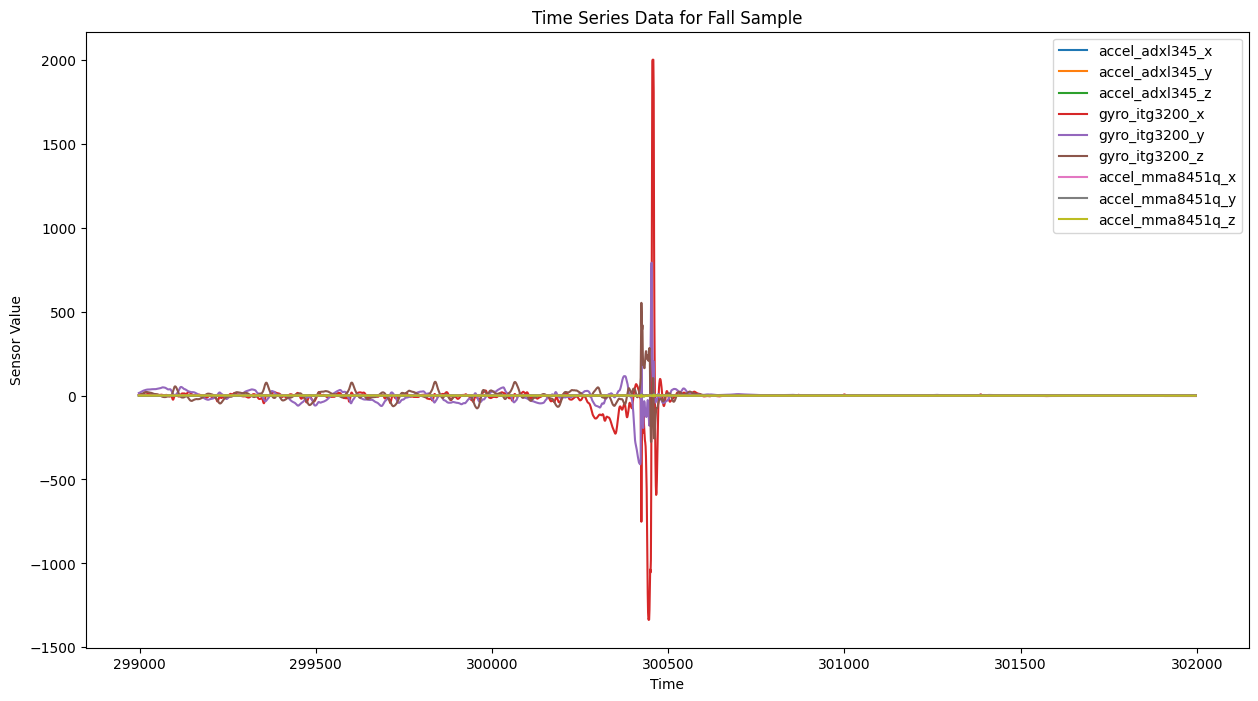

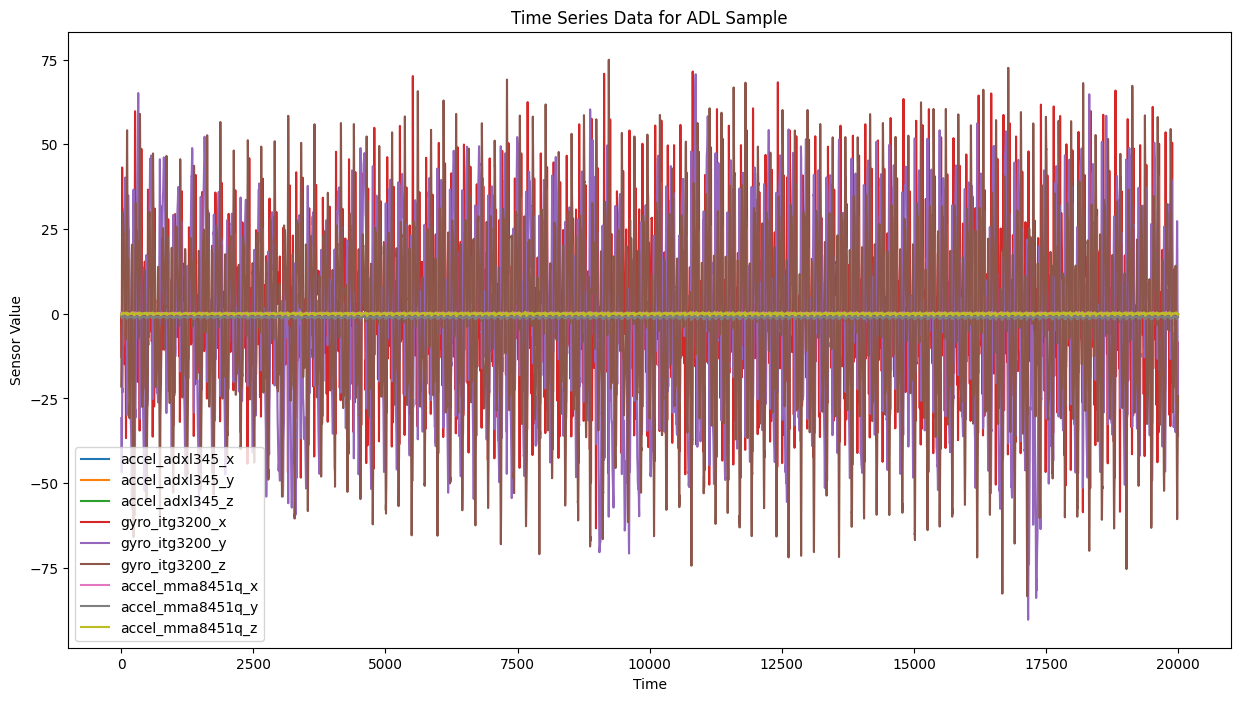

In [227]:
# Visualize the time series data for a sample fall and ADL
def plot_time_series(data, label):
    plt.figure(figsize=(15, 8))
    for col in data.columns:
        if 'accel' in col or 'gyro' in col:
            plt.plot(data[col], label=col)
    plt.title(f'Time Series Data for {label}')
    plt.xlabel('Time')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.show()


# Plot time series for a sample fall
fall_sample = sisfall_data[sisfall_data['label'] == 'fall'].iloc[0]
fall_data = sisfall_data[sisfall_data['filename'] == fall_sample['filename']]
plot_time_series(fall_data, 'Fall Sample')
# Plot time series for a sample ADL
adl_sample = sisfall_data[sisfall_data['label'] == 'adl'].iloc[0]
adl_data = sisfall_data[sisfall_data['filename'] == adl_sample['filename']]
plot_time_series(adl_data, 'ADL Sample')

## Preprocess the dataset

### Avoiding Subject Bias in Train-Test Split

When working with the SisFall dataset (or any dataset where multiple recordings come from the same individuals), it is essential to avoid data leakage caused by random sample splitting. 

If we randomly split the dataset into training and testing sets, we risk placing samples from the same subject in both sets. This introduces what is known as "subject bias" — the model can inadvertently learn personal characteristics or movement patterns of specific individuals rather than learning to generalize fall detection across new, unseen people. This would artificially inflate evaluation metrics (such as accuracy and F1-score), because the model is partially memorizing rather than generalizing.

To address this, we use a subject-wise splitting strategy:  
- We first extract the list of unique subjects.  
- Then we split these subjects into train and test groups.  
- Finally, we assign samples based on the subject to which they belong.

This ensures that the model is evaluated on entirely unseen individuals, simulating real-world scenarios where fall detection must work for new users. It leads to more honest and generalizable performance metrics.

In [228]:
# Split the dataset into features and labels
# X = sisfall_data.drop(columns=['label', 'filename', 'subject'])
# y = sisfall_data['label']

In [229]:
# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [230]:
# Extract unique subjects
subjects = sisfall_data['subject'].unique()

# Subject-wise split
train_subjects, test_subjects = train_test_split(subjects, test_size=0.2, random_state=42)

# Assign samples based on subject
train_data = sisfall_data[sisfall_data['subject'].isin(train_subjects)]
test_data = sisfall_data[sisfall_data['subject'].isin(test_subjects)]

In [231]:
# Separate features and labels
X_train = train_data.drop(columns=['label', 'filename', 'subject'])
y_train = train_data['label'].map({'adl': 0, 'fall': 1})

X_test = test_data.drop(columns=['label', 'filename', 'subject'])
y_test = test_data['label'].map({'adl': 0, 'fall': 1})

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 13109809, Testing samples: 2749120


In [232]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
# Convert the scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [234]:
# Check the shape of the training and testing sets
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((13109809, 9), (13109809,), (2749120, 9), (2749120,))

In [235]:
# Check the first few rows of the scaled training set
X_train_scaled.head()

,accel_adxl345_x,accel_adxl345_y,accel_adxl345_z,gyro_itg3200_x,gyro_itg3200_y,gyro_itg3200_z,accel_mma8451q_x,accel_mma8451q_y,accel_mma8451q_z
0,0.171054,-0.019284,-0.563746,-0.012848,-1.115412,-0.883684,0.224737,-0.013171,-0.421537
1,0.152271,0.014366,-0.491793,-0.078109,-1.248011,-0.766833,0.157219,0.024869,-0.372255
2,0.020791,0.000906,-0.419839,-0.135912,-1.341245,-0.677925,0.036651,0.036973,-0.307203
3,-0.082515,-0.026013,-0.387860,-0.173204,-1.411688,-0.566156,-0.040512,-0.013171,-0.216524
4,-0.185821,-0.100043,-0.275932,-0.217955,-1.469700,-0.474708,-0.136966,-0.089250,-0.133731


In [236]:
# Check the first few rows of the scaled testing set
X_test_scaled.head()

,accel_adxl345_x,accel_adxl345_y,accel_adxl345_z,gyro_itg3200_x,gyro_itg3200_y,gyro_itg3200_z,accel_mma8451q_x,accel_mma8451q_y,accel_mma8451q_z
0,0.283751,-0.497109,0.299696,0.026309,-0.941375,-0.319754,0.222325,-0.564747,0.205329
1,0.246186,-0.470189,0.275712,0.044955,-0.899938,-0.329915,0.205446,-0.566476,0.209271
2,0.236794,-0.483649,0.283707,0.059872,-0.866788,-0.342616,0.203034,-0.564747,0.217157
3,0.264968,-0.476919,0.307691,0.080383,-0.835710,-0.347696,0.198212,-0.559559,0.205329
4,0.236794,-0.456729,0.283707,0.085977,-0.802560,-0.340076,0.190978,-0.542269,0.195473


## Save the preprocessed dataset

In [237]:
# Save the preprocessed dataset to CSV files
X_train_scaled.to_csv('sisfall_X_train_scaled.csv', index=False)
X_test_scaled.to_csv('sisfall_X_test_scaled.csv', index=False)
y_train.to_csv('sisfall_y_train.csv', index=False)
y_test.to_csv('sisfall_y_test.csv', index=False)

## Load the preprocessed dataset

In [238]:
# Load the preprocessed dataset from CSV files
X_train_scaled = pd.read_csv('sisfall_X_train_scaled.csv')
X_test_scaled = pd.read_csv('sisfall_X_test_scaled.csv')
y_train = pd.read_csv('sisfall_y_train.csv')
y_test = pd.read_csv('sisfall_y_test.csv')

# Check the shape of the loaded dataset
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((13109809, 9), (13109809, 1), (2749120, 9), (2749120, 1))